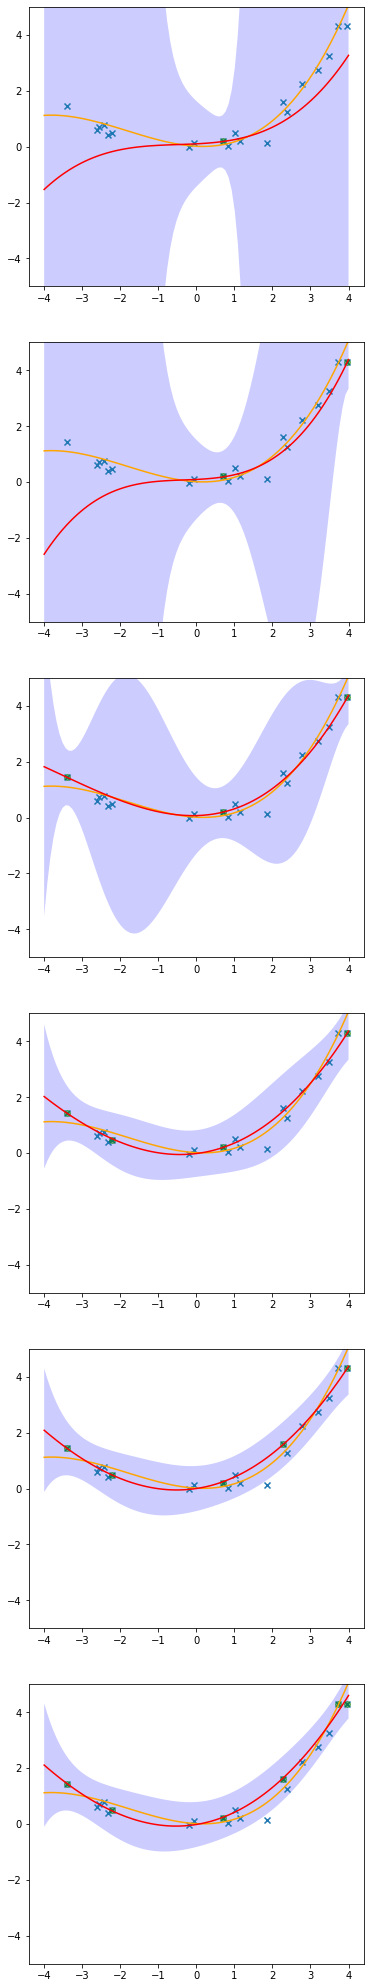

In [1]:
%matplotlib inline
 
import numpy as np
import matplotlib.pyplot as plt

dimension = 3
dataNum = 20
originalSigmaW2 = 0.01
minX = -4.0
maxX = 4.0
dataSigma2 = 0.25
sampleFunctionNum = 5
constSigma = 2.0

# Parameters for learning
priorSigmaW2 = 1.0
sigmaY2 = dataSigma2

# Parameters for active 
annotatedDataNum = 6

def getPhi(X, dimension):
    phi = [1]
    for i in range(dimension):
        phi.append(phi[-1] * X)
    
    return phi

def getPhiArray(X, dimension):
    phiArray = []
    
    for x in X:
        phiArray.append(getPhi(x, dimension))

    return phiArray
        
def polynominalFunc(X, dimension, weight):
    retValue = []
    
    for x in X:
        phi = getPhi(x, dimension)
        
        retValue.append(weight.dot(phi))
        
    return retValue

# Initialization
# Get training data
xPool = []
yPool = []
trainX = []
trainY = []

meanOfWeight = np.zeros(dimension + 1)
covOfWeight = originalSigmaW2 * np.eye(dimension + 1)
weightForTrainingData = np.random.multivariate_normal(meanOfWeight, covOfWeight)

originalFuncX = np.linspace( minX, maxX, 100)
originalFuncY = polynominalFunc(originalFuncX, dimension, np.array(weightForTrainingData))

xPool = (maxX - minX) * np.random.rand(dataNum) + minX
# Only annotator knows this list
yPool = np.random.normal(polynominalFunc(xPool, dimension, np.array(weightForTrainingData)), dataSigma2)

xPoolForLearning = list(xPool.copy())
yPoolForAnnotation = list(yPool.copy())
sigmaForXPoolForLearning = [float('inf')] * len(xPoolForLearning)

fig = plt.figure(figsize = (6, 6 * annotatedDataNum))

#End of Initialization

for i in range(annotatedDataNum):
    
    # Select a piece of data
    # (3.81)
    index = np.argmax(sigmaForXPoolForLearning)

    # Annotation
    trainX.append(xPoolForLearning.pop(index))
    trainY.append(yPoolForAnnotation.pop(index))
    sigmaForXPoolForLearning.pop(index)
    
    # Beginning of learning
    phiArray = np.array(getPhiArray(trainX, dimension))

    # (3.72)
    sigmaHat = np.linalg.inv((1/sigmaY2) * phiArray.T.dot(phiArray) + (1/priorSigmaW2) * np.eye(dimension + 1))
    # (3.73)
    muHat = (1/sigmaY2) * sigmaHat.dot(phiArray.T).dot(np.array(trainY).T)

    # (3.76)
    predictedY = polynominalFunc(originalFuncX, dimension, muHat)

    # (3.77)
    predictedSigma = []
    for x in originalFuncX:
        phiX = np.array(getPhi(x, dimension))
        predictedSigma.append(sigmaY2 + phiX.dot(sigmaHat).dot(phiX.T))
    upperPredictedY = predictedY + constSigma * np.array(predictedSigma)
    lowerPredictedY = predictedY - constSigma * np.array(predictedSigma)
    # End of learning 
        
    # Beginning of plot
    # Make data set for plot 
    # Plot the data
    ax = fig.add_subplot(annotatedDataNum, 1, i + 1)
    plt.plot(originalFuncX, originalFuncY, color = "orange")
    plt.plot(originalFuncX, predictedY, color = "red")
    ax.fill_between(originalFuncX, upperPredictedY, lowerPredictedY, facecolor='blue', alpha=0.2)
    plt.scatter(xPool, yPool, marker = 'x')
    plt.scatter(trainX, trainY, color = "green", alpha = 0.5)
    ax.set_ylim(-5.0, 5.0)
    # End of plot
    
    # Update criteria (sigma)
    # (3.77)
    for j in range(len(sigmaForXPoolForLearning)):
        phiX = np.array(getPhi(xPoolForLearning[j], dimension))
        sigmaForXPoolForLearning[j] = sigmaY2 + phiX.dot(sigmaHat).dot(phiX.T)
        
plt.show()